<font size="+3"><b>Final Project: PCA and Clustering
</b></font>

***
* **Full Name** = Nathan Ante   
* **UCID** = 30157706
***

<font color='Blue'>
The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.
</font>

<font color='Red'>
For this assignment, in addition to your .ipynb file, please also attach a PDF file. To generate this PDF file, you can use the print function (located under the "File" within Jupyter Notebook). Name this file ENGG444_Final_Project_yourUCID.pdf (this name is similar to your main .ipynb file). We will evaluate your assignment based on the two files and you need to provide both.
</font>


|                 **Question**                | **Point(s)** |
|:-------------------------------------------:|:------------:|
| **1. Principle Component   Analysis (PCA)** |              |
|                     1.1                     |       3      |
|                     1.2                     |       2      |
|                     1.3                     |       2      |
|                     1.4                     |       3      |
|                     1.5                     |       6      |
|                     1.6                     |       2      |
|         **2. Pipeline and Modeling**        |              |
|                     2.1                     |       3      |
|                     2.2                     |       2      |
|                     2.3                     |       2      |
|                     2.4                     |       3      |
|            **3. Bonus Question**            |     **2**    |
|                    Total                    |      28      |

## Data

The data on [this page](https://archive.ics.uci.edu/dataset/236/seeds) pertains to a study on wheat kernels, specifically focusing on the geometrical properties of kernels from three different wheat varieties: Kama, Rosa, and Canadian. Here's a summary of the key points:

- **Dataset Characteristics**: The data is multivariate and real-valued, used for classification and clustering tasks in biology.
- **Measurement Technique**: A soft X-ray technique was employed for high-quality visualization of the internal kernel structure, which is non-destructive and cost-effective compared to other methods.
- **Geometric Parameters**: Seven parameters were measured for each kernel: area (A), perimeter (P), compactness (C = 4*pi*A/P^2), length, width, asymmetry coefficient, and length of kernel groove.
- **Research Purpose**: The dataset facilitates the analysis of features in X-ray images of wheat kernels and can be applied to various statistical and machine learning tasks.

This dataset was collected for an experiment conducted at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin and has been cited in several research papers for its application in feature analysis and classification algorithms.

In [1]:
# Download the zip file using wget
!wget -N "https://archive.ics.uci.edu/static/public/236/seeds.zip"

# Unzip wine.data from the downloaded zip file
!unzip -o seeds.zip seeds_dataset.txt

# Remove the downloaded zip file after extraction
!rm -r seeds.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# 1. area A,
# 2. perimeter P,
# 3. compactness C = 4*pi*A/P^2,
# 4. length of kernel,
# 5. width of kernel,
# 6. asymmetry coefficient
# 7. length of kernel groove.

# https://archive.ics.uci.edu/dataset/236/seeds

import pandas as pd

data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)
data.columns = ['Area', 'Perimeter', 'Compactness',
                'Length of Kernel', 'Width of Kernel',
                'Asymmetry Coefficient', 'Length of Kernel Groove', 'Type']
display(data)

<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Macante\AppData\Local\Temp\ipykernel_21124\1635931554.py:13: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('seeds_dataset.txt', sep = '\s+', header = None)


,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


## 1. Principle Component Analysis (PCA)

### 1.1 Preprocessing (3 Points)

- **Split the data into X and y** (0.5 Point)
  - Assign the features to `X` and the target variable to `y`.

- **Stratified Split of X and y into Train and Test Sets** (0.5 Point)
  - Utilize stratification to ensure representative distribution of classes while splitting.

- **Plot Train and Test Proportions in a Pie Chart** (2 Points)
  - The pie chart should include:
    - Labels indicating 'Training Set' and 'Test Set'.
    - A title for the chart.
    - Proportion percentages for the Training and Test sets displayed on each slice of the pie.
    - The number of entries within the Training and Test sets shown below the corresponding percentage.

Text(0.3, -1.2, 'Test Set Entries: 42')

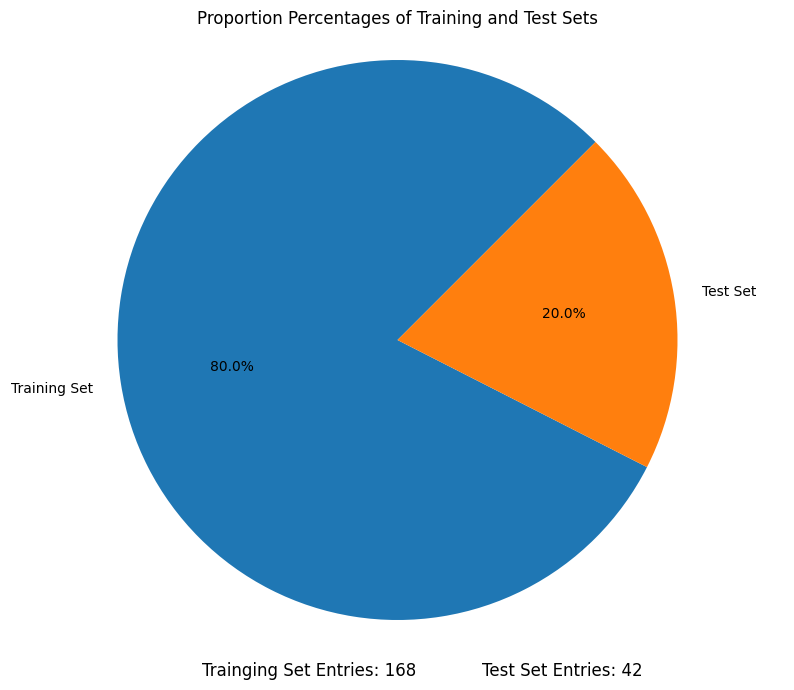

In [3]:
# 1.1
# Add necessary code here.

# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting the dataset, assuming the last column is the target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Size percentages
train_size = len(y_train) / len(y)
test_size = len(y_test) / len(y)

# Labels and proportions
labels = ['Training Set', 'Test Set']
proportions = [train_size, test_size]

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=45)
plt.title('Proportion Percentages of Training and Test Sets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding the number of entries below each slice
plt.text(-0.7, -1.2, f'Trainging Set Entries: {len(y_train)}', fontsize=12)
plt.text(0.3, -1.2, f'Test Set Entries: {len(y_test)}', fontsize=12)


### 1.2 Scaling the Data (2 Points)

To ensure that our preprocessing pipeline optimizes the performance of our machine learning model, we need to scale the data appropriately.

- **Selecting an Appropriate Scaler**:
  - Explain your choice of scaler for the dataset. (1 Points)
  - Justify your decision based on the characteristics of the data and the requirements of the algorithm being used. (1 Points)


In [4]:
from sklearn.preprocessing import StandardScaler

# use standard scaler, fit the data before transforming
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to dataframes
col_names = ['Area', 'Perimeter', 'Compactness', 'Length of Kernel', 'Width of Kernel', 'Asymmetry Coefficient', 'Length of Kernel Groove']
X_train_scaled = pd.DataFrame(X_train_scaled, columns=col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=col_names)

<font color='Green'><b>Answer:</b></font>

**1.2** .....................

I chose standard scaler as it is versatile and works well with many algorithms such as SVM, KNN, and etc. It also preserves the original distribution of the data by transforming it so that each feature has a mean of 0 and the variance is 1. It is also straightforward and easy to implement.

### 1.3 Model Selection and Justification (2 Points)

- **Choose an Appropriate Machine Learning Model**:
  - Identify the model that you believe is most suitable for the dataset.
  - Provide a justification for your choice based on the dataset's characteristics.

In [5]:
# 1.3
# Add necessary code here.

# imports
from sklearn.svm import SVC

# Random Forest Classifier model
svc = SVC()

<font color='Green'><b>Answer:</b></font>

**1.3** .....................

I chose SVC as it is a powerful model that performs well on a variety of datasets. It works well on both high and low dimensional data. SVC also allows for complex decision boundaries even if the data only has a few features. Another reason I chose SVC is because of the size of our dataset, SVC doesnt scale well on larger samples. I also tried to go for a model that required scaling since we went through the trouble of doing it in the first place.

### 1.4 Hyperparameter Optimization with Grid Search (3 Points)

- **Set Up the Grid Search**:
  - Construct a pipeline that incorporates the selected scaler from part 1.2 to standardize the data.
  - Execute a grid search within this pipeline to identify the best hyperparameter settings for your chosen model.
  - Provide a broad and varied range of hyperparameter values to ensure a thorough search.


In [6]:
# 1.4
# Add necessary code here.
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10, 100],                   
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5)
grid_search_svc.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search_svc.best_params_)

Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}


<font color='Green'><b>Answer:</b></font>

**1.4** .....................

**Best Hyperparameters:**

- **Regularization parameter (C):** 100

- **Kernel:** Linear

- **Gamma:** Scale

### 1.5 Dimensionality Reduction and Model Optimization (6 Points)

- **Dimensionality Reduction Choice** (2 Points):
  - Choose between PCA and t-SNE for reducing the dataset to two dimensions.
  - Justify your selection based on the characteristics of the seeds dataset.

- **Implement Dimensionality Reduction** (2 Points):
  - Apply the chosen dimensionality reduction technique to the seeds dataset.
  - Reduce the dataset to two dimensions as required.

- **Model Optimization on Reduced Data** (2 Points):
  - Redo the grid search from part 1.4 using the two-dimensional data.
  - Compare the model's performance with the original higher-dimensional data.

In [7]:
# 1.5
# Add necessary code here.

# Import
from sklearn.decomposition import PCA

# Implement Dimensionality Reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model Optimization on Reduced Data
grid_search_pca = GridSearchCV(svc, param_grid_svc, cv=5)
grid_search_pca.fit(X_train_pca, y_train)

print("Best Hyperparameters:", grid_search_pca.best_params_)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}


<font color='Green'><b>Answer:</b></font>

**1.5** .....................

- **Dimensionality Reduction Choice**:
    - I chose to use PCA because the grid search earlier favored a linear kernel, suggesting that the data could be separated well by linear boundaries. PCA can help simplify the data and improve computational efficiency. It also simplifies the data whil retaining trends and patterns.

- **Model Optimization on Reduced Data**:
    - **Best Hyperparameters Before PCA:**
        - **Regularization parameter (C):** 100
        - **Kernel:** Linear
        - **Gamma:** Scale
    - **Best Hyperparameters After PCA:**
        - **Regularization parameter (C):** 1
        - **Kernel:** Sigmoid
        - **Gamma:** Scale
    - **Comparison:**
        - Before using PCA, the regularization parameter was 100, used a linear kernel, and the gamma was set to scale. After using PCA, the new optimal hyperparameters were a regularization parameter of 1, a sigmoid kernel, and gamma to scale. This means that PCA altered the data representation and suggests that a non-linear approach to be more effective.

### 1.6 Visualizing Reduced Dimensionality Data (2 Points)

- **Create a 2D Scatter Plot for Training and Testing Sets**:
  - Generate 1-row-two-column subplots for scatter plots for the two-dimensional training and testing data obtained from part 1.5.
  - Clearly label the x-axis and y-axis for both plots.
  - Include a legend in each plot that distinctly represents the distribution of the three classes (you can use different shapes and colors to represent different classes).

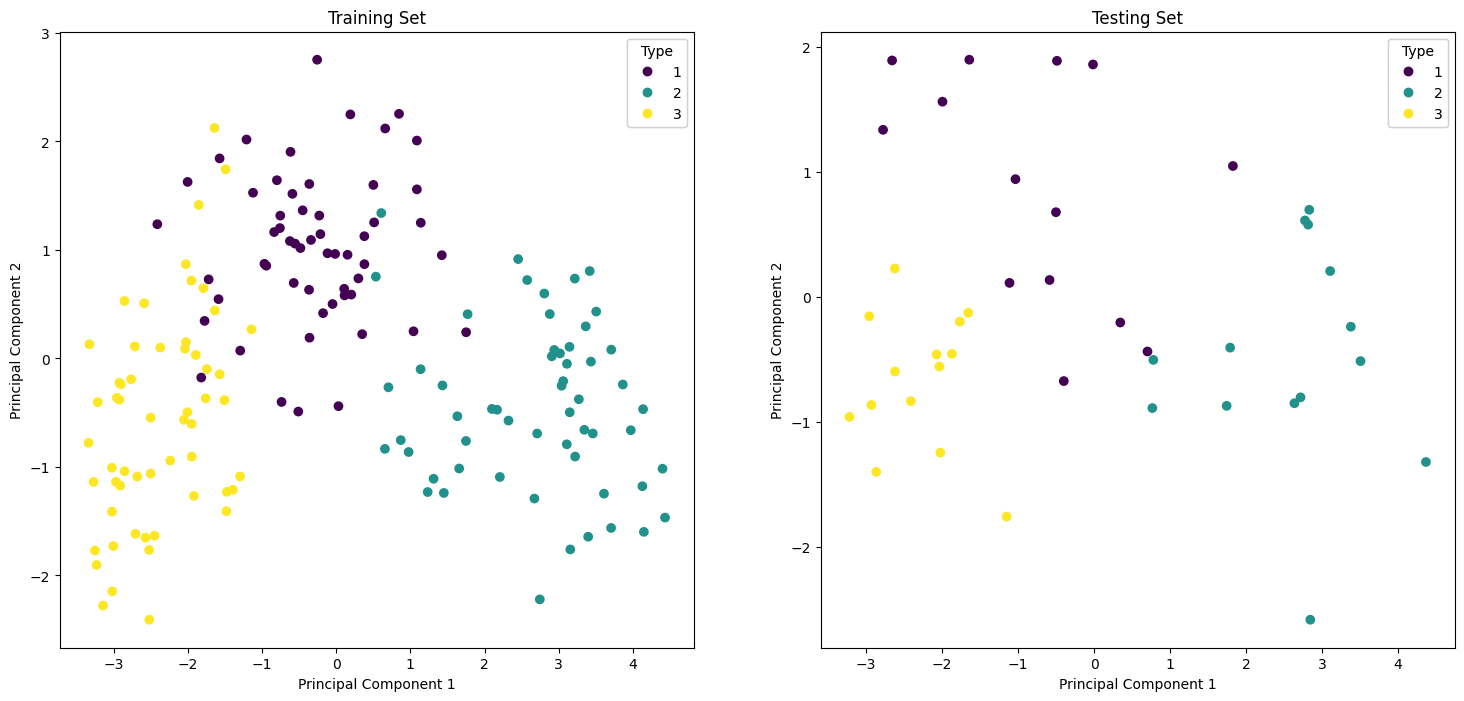

In [8]:
# 1.6
# Add necessary code here.

# Generate subplots
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Training Data Plot
train_scatter = ax[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
train_legend = ax[0].legend(*train_scatter.legend_elements(), title="Type")
ax[0].add_artist(train_legend)
ax[0].set_title('Training Set')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Test Data Plot
test_scatter = ax[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
test_legend = ax[1].legend(*test_scatter.legend_elements(), title="Type")
ax[1].add_artist(test_legend)
ax[1].set_title('Testing Set')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

# Display plot
plt.show()

## 2. Clustering and Visualization of the Seeds Dataset

### 2.1 Create a Pipeline for Scaling and K-Means Clustering (3 Points)

- Construct a pipeline that includes a scaler and the K-Means clustering algorithm.
- Use the `KelbowVisualizer` with `metric='calinski_harabasz'` from Yellowbrick to determine the optimal number of clusters, `k`.
- Explain the results of the `KelbowVisualizer`.

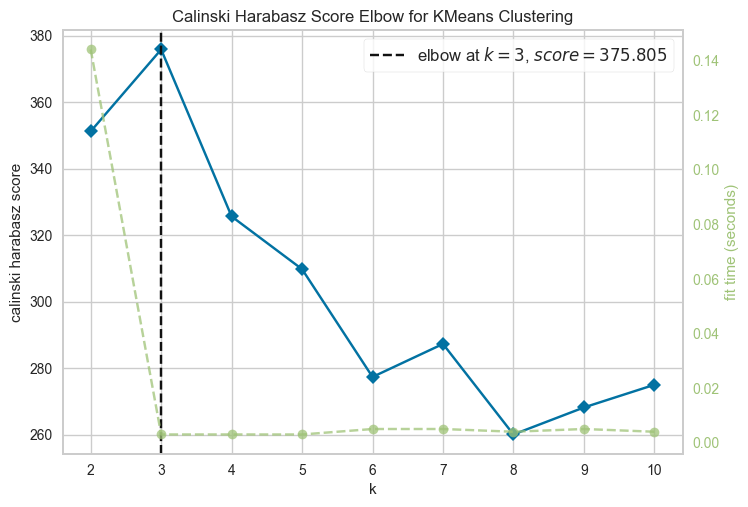

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
# 2.1
# Add necessary code here.

# imports
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Pipepline with scaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(random_state=42))
])

# Find optimal number of clusters within a range of 2-10 clusters
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2,11), metric='calinski_harabasz')
visualizer.fit(X)  # X is your dataset features
visualizer.show()

<font color='Green'><b>Answer:</b></font>

**2.1** .....................

The optimal number of clusters was based on the highest value of the Calinski Harabasz Index, which in this case is 3. When increasing the number of clusters from 2 to 3, we can see that the score increased, but adding clusters greater than 3 decreased the score significantly. Based on the visual representation, the optimal number of clusters is 3, this also aligns with the number of types in the seeds dataset which have 3 classes. 

### 2.2 Label the Data Using the Optimal Number of Clusters (2 Points)
- Label the training data using the pipeline that includes both the scaler and K-Means with the optimal `k` found in part 2.1.

In [10]:
# 2.2
# Add necessary code here.

# Get optimal number of clusters, which is the elbow value
optimal_k = visualizer.elbow_value_ 

# label the training data using the pipeline
pipeline.set_params(kmeans__n_clusters=optimal_k)
pipeline.fit(X)
labels = pipeline.predict(X)

### 2.3 Dimensionality Reduction Using PCA (2 Points)
- Apply PCA to reduce the dimensionality of the dataset to 2D.

In [11]:
# 2.3
# Add necessary code here.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

#### 2.4 Plot the 2D Data with Cluster Labels (3 Points)
- Create a 2D scatter plot of the PCA-reduced data.
- Color the points using the labels obtained from K-Means clustering.

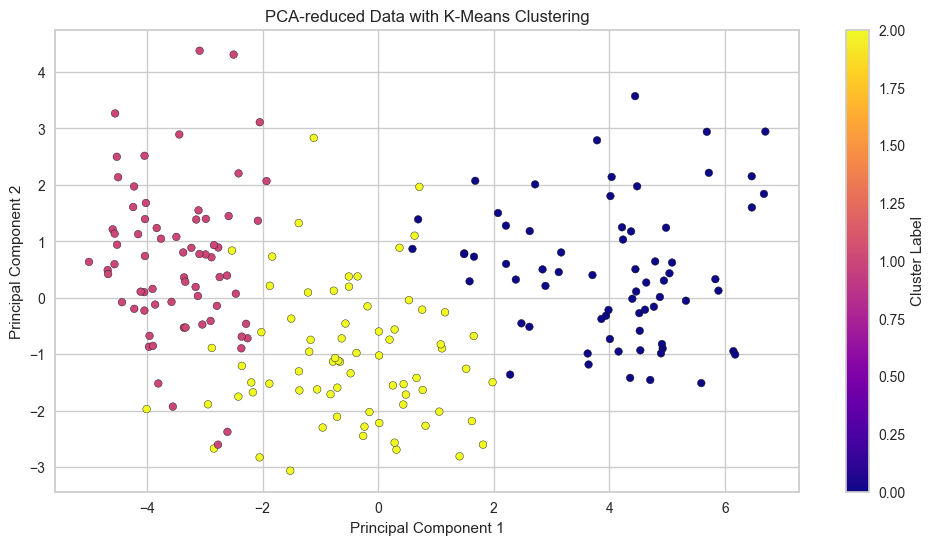

In [12]:
# 2.4
# Add necessary code here.

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', edgecolor='k', s=30)
plt.title('PCA-reduced Data with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

## Bonus Question: Interpretation of Clustering Results (2 Points)

- **Analyze and Interpret the Clustering Outcome**:
  - Based on the 2D PCA plot with K-Means clustering labels from part 2.4, provide an interpretation of the clustering results.
  - Discuss any patterns or insights observed from the plot, considering the distribution and overlap of clusters.

<font color='Green'><b>Answer:</b></font>

**Bonus Question** .....................

- Based on the density of the clusters, there is a higher concentration of data points assigned to the yellow cluster(middle), followed by the blue cluster(blue), and the least being the left cluster(pink).

- Each cluster seems to well separated from other clusters with some overlap, this indicates that the algorithm successfully identified each class.

- There are some minor overlaps with the middle(yellow) and right(blue) clusters, while there is a greater density of overlaps with the middle(yellow) and left(pink) clusters. This may indicate ambiguity of the data in these clusters and the algorithm has a harder time classifying them. This may be due to similar features or limitation in using just two dimensions.